In [96]:
# a,b,c,f observed d,e unobserved
# a,b,c,d affect x/y
# a,b,c,d,e affect X/Y
# y = a+b+ab-c^2-d

import numpy as np

ay = np.random.normal(size=(100))
ax = np.random.normal(size=(1000))
by = np.random.normal(size=(100))
bx = np.random.normal(size=(1000))
cy = np.random.normal(size=(100))
cx = np.random.normal(size=(1000))
dy = np.random.normal(size=(100))
dx = np.random.normal(size=(1000))
ey = np.random.normal(size=(100))
ex = np.random.normal(size=(1000))
fy = np.random.normal(size=(100))
fx = np.random.normal(size=(1000))

A = np.random.normal(size=(1000))
B = np.random.normal(size=(1000))
AB = np.random.normal(size=(1000))
C2 = np.random.normal(size=(1000))
D = np.random.normal(size=(1000))
E = np.random.normal(size=(1000))

AX = np.einsum('n,x->nx', ax, A)
BX = np.einsum('n,x->nx', bx, B)
ABX = np.einsum('n,x->nx', ax*bx, AB)
C2X = np.einsum('n,x->nx', cx*cx, C2)
DX = np.einsum('n,x->nx', dx, D)
EX = np.einsum('n,x->nx', ex, E)

X = AX+BX+ABX+C2X+DX+EX

AY = np.einsum('n,x->nx', ay, A)
BY = np.einsum('n,x->nx', by, B)
ABY = np.einsum('n,x->nx', ay*by, AB)
C2Y = np.einsum('n,x->nx', cy*cy, C2)
DY = np.einsum('n,x->nx', dy, D)
EY = np.einsum('n,x->nx', ey, E)

Y = AY+BY+ABY+C2Y+DY+EY

y = ay+by+ay*by+cy*cy-dy
x = ax+bx+ax*bx+cx*cx-dx
print(y)

[ 2.4168257   2.37114567 -2.64294847  0.12453696  0.27143532  1.74103021
  2.11392224  0.61256219  0.10600375  2.17074561  1.0873382   2.08493175
  0.38643679 -1.57515694 -0.53504889 -0.37942346  0.79646143  1.15128105
  0.44739071  0.87643812  2.52028132 -0.50998188  1.33278334  4.17448175
  2.68625824  1.0749792   1.25766109  1.74465528 -1.58403155 -0.48786173
  1.04257033 -0.56072358 -1.93750394  2.39892606 -0.4345708   0.73149435
  5.38684829 -0.64476228 -0.7132238  -2.82782896  1.52255999  9.10234494
  1.43199081 -4.79656213  3.23325605  0.19533885  3.60457069  0.28701227
  0.51292794  2.01201766 -1.76968689  6.23942027  2.676251    3.20065065
 -1.30286615  2.69541377  0.81646614  0.49244106 -0.2721769   8.39331916
  4.20831857  4.36507564  4.28762     3.67983728 -0.30548619  0.96066223
  1.67396317  2.18143715  5.23140945  3.95850888  2.49230077 -0.37339687
  1.06350058  1.86804984  0.60402775 -0.62746845 -1.59940092  0.29555816
 -1.79739262  1.8974248  -0.22187154  1.61880587  0

In [97]:
# Make y from Y model

from sklearn.linear_model import Ridge

regYy = Ridge(alpha=100).fit(Y, y)
yhat = regYy.predict(Y)
yhat

array([ 2.41551215,  2.36903087, -2.63646897,  0.12524208,  0.27277139,
        1.74137464,  2.11303233,  0.6130244 ,  0.10664391,  2.17113014,
        1.08641256,  2.08445641,  0.38783542, -1.57242415, -0.53124037,
       -0.37691162,  0.7971504 ,  1.15045651,  0.44836247,  0.87788514,
        2.5170117 , -0.5080811 ,  1.33247267,  4.17082426,  2.68410366,
        1.07499891,  1.25698098,  1.74388271, -1.5803744 , -0.48608709,
        1.04207624, -0.55723285, -1.93251434,  2.39861747, -0.43272438,
        0.73254227,  5.38293295, -0.64189838, -0.71035104, -2.8240547 ,
        1.5220454 ,  9.09414183,  1.43027944, -4.78989542,  3.23072743,
        0.1958365 ,  3.60147311,  0.28806407,  0.5146552 ,  2.00990174,
       -1.76473801,  6.23271682,  2.67417248,  3.19786339, -1.29850638,
        2.69376159,  0.81715505,  0.49226509, -0.27023322,  8.38344716,
        4.2052421 ,  4.36252973,  4.28620044,  3.67692027, -0.30368987,
        0.96170118,  1.67189918,  2.17906388,  5.22627176,  3.95

In [98]:
# Predict a,b,c,f from X (Y)

from sklearn.linear_model import Lasso

reg_abcf = Ridge(alpha=1).fit(X, np.stack([ax, bx, cx, fx, ax*ax, ax*bx, ax*cx, ax*fx, bx*bx, bx*cx, bx*fx, cx*cx, cx*fx, dx*fx]).T)
# reg_abcf = Ridge(alpha=100).fit(X, np.stack([ax, bx, cx, fx]).T)
abcfhat = reg_abcf.predict(Y)
abcfhat[:5]

array([[-0.25999858,  0.65286389, -0.02825575,  0.04188967,  0.9107682 ,
        -0.1697438 , -0.07110447, -0.05643943,  1.03454975, -0.05933957,
         0.01260517,  1.11714943, -0.12490754, -0.08929395],
       [ 0.6969539 ,  0.20151415, -0.02937932,  0.00329825,  1.03501448,
         0.14044622, -0.01202247, -0.06240023,  1.01192476,  0.00802798,
        -0.02600456,  0.58448258, -0.03214616, -0.03561331],
       [-2.66705816, -0.56650006, -0.1584887 , -0.1146612 ,  0.75583652,
         1.51089082,  0.07658207,  0.19018523,  0.52617557,  0.27473011,
         0.12675563,  0.2876764 ,  0.16615852, -0.08243202],
       [ 0.2924209 ,  0.06347696, -0.06661183, -0.03267229,  1.0675619 ,
         0.01856193,  0.07257366, -0.02436402,  1.02844548,  0.03841752,
        -0.02181107,  0.16776239,  0.06795126,  0.02685282],
       [-0.83781331,  0.38800742, -0.06401441,  0.01288222,  0.90056746,
        -0.32507808, -0.00854506, -0.02172672,  1.03775914, -0.02697781,
         0.03014772,  0.74

In [99]:
# Get coefficients of a,b,c,f for y

coef = Ridge(alpha=1).fit(abcfhat, y)
for c in coef.coef_:
    print(c)

1.1974793247530955
0.7371039308764936
0.39332801352269564
0.7578630505388811
-2.2416678647212733
1.1001657267202811
-2.257770734636881
-1.5954178541204145
0.8649472520970325
-0.22120890929417042
0.15445298441703767
0.8636534174654946
-0.33352009622240947
-2.540748329470057


In [45]:
# Create VAE model

import sys

sys.path.append('/home/anton/Documents/Tulane/Research/demo-vae/pip/src/')

from demovae import DemoVAE

demos = [ax, bx, cx, fx, ax*ax, ax*bx, ax*cx, ax*fx, bx*bx, bx*cx, bx*fx, cx*cx, cx*fx, dx*fx]
demo_types = ['continuous']*len(demos)

vae = DemoVAE(pperiod=200, use_cuda=True, nepochs=5000, latent_dim=20, weight_decay=0, lr=5e-5, loss_rec_mult=1e3,
              loss_pred_mult=100, loss_C_mult=1e4, alpha=10)
vae.fit(X, demos, demo_types)

Fitting auxilliary guidance model for demographic 0 continuous... done
Fitting auxilliary guidance model for demographic 1 continuous... done
Fitting auxilliary guidance model for demographic 2 continuous... done
Fitting auxilliary guidance model for demographic 3 continuous... done
Fitting auxilliary guidance model for demographic 4 continuous... done
Fitting auxilliary guidance model for demographic 5 continuous... done
Fitting auxilliary guidance model for demographic 6 continuous... done
Fitting auxilliary guidance model for demographic 7 continuous... done
 doneng auxilliary guidance model for demographic 8 continuous...
Fitting auxilliary guidance model for demographic 9 continuous... done
Fitting auxilliary guidance model for demographic 10 continuous... done
Fitting auxilliary guidance model for demographic 11 continuous... done
Fitting auxilliary guidance model for demographic 12 continuous... done
Fitting auxilliary guidance model for demographic 13 continuous... done
Convert

DemoVAE(LR_C=100, alpha=10, bsize=1000, latent_dim=20, loss_C_mult=10000.0,
        loss_decor_mult=10, loss_mu_mult=1, loss_pred_mult=100,
        loss_rec_mult=1000.0, lr=5e-05, nepochs=5000, pperiod=200,
        use_cuda=True, weight_decay=0)

In [50]:
for i in range(5):
    ndemos1 = []
    ndemos2 = []
    for d in demos:
        ndemos1.append(np.zeros(len(d)))
        ndemos2.append(np.zeros(len(d)))

    ab = 0.5
    ndemos2[1] = ab*np.ones(len(X))
    X1 = vae.transform(len(X), ndemos1, demo_types)
    X2 = vae.transform(len(X), ndemos2, demo_types)
    y1 = regYy.predict(X1)
    y2 = regYy.predict(X2)
    print(np.sum(y2-y1)/len(X))

0.5208949904940419
0.5539225808992665
0.49923467312541286
0.5663667800108664
0.5014886631982907


In [14]:
len(demos)

14

In [76]:
vals = '-0.05312139068	-0.03566246842	-0.03885258626	-0.03791446669	-0.05149236599'
vals = [float(v) for i,v in zip(range(5), vals.split())]
absc = np.array([[v] for v in [0.5, 1, 1.5, 2, 2.5]])

reg = Ridge(alpha=0).fit(absc, vals)
print(reg.coef_[0])

0.00020121022200000064


/tmp/ipykernel_128383/252343453.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


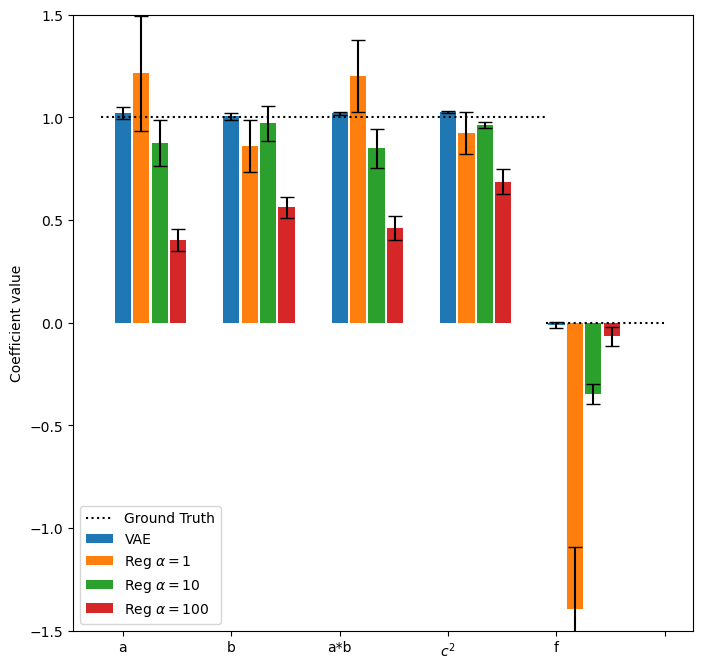

In [135]:
import matplotlib.pyplot as plt

vae_stuff = [1.020668995, 1.00422373, 1.018932711, 1.02709847, -0.01040522881]
vae_errs = [0.03031483977, 0.0150509222, 0.007226802652, 0.003767308256, 0.01474297591]
ticks = np.arange(0,5)
labels = ['', 'a', 'b', 'a*b', '$c^2$', 'f']

alpha1_stuff = [1.214928372, 0.8603755959, 1.20151115, 0.9256126556, -1.395471027]
alpha1_errs = [0.2801298942, 0.127351477, 0.1730589265, 0.1026164524, 0.305341553]

alpha10_stuff = [0.8753601626, 0.970418808, 0.848445819, 0.9625237525, -0.3462458949] 
alpha10_errs = [0.1121831824, 0.08691340647, 0.09702837485, 0.01666317196, 0.04825578545]

alpha100_stuff = [0.4025130036, 0.5615984615, 0.4631057929, 0.6868878347, -0.06697235815]
alpha100_errs = [0.0539084285, 0.05210501009, 0.05849013544, 0.05936198564, 0.04644516097]

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.bar(ticks, vae_stuff, yerr=vae_errs, capsize=5, label='VAE', width=0.15)
ax.bar(ticks+0.17, alpha1_stuff, yerr=alpha1_errs, capsize=5, label='Reg $\\alpha=1$', width=0.15)
ax.bar(ticks+0.34, alpha10_stuff, yerr=alpha10_errs, capsize=5, label='Reg $\\alpha=10$', width=0.15)
ax.bar(ticks+0.51, alpha100_stuff, yerr=alpha100_errs, capsize=5, label='Reg $\\alpha=100$', width=0.15)
ax.plot([-0.2,3.9],[1,1],linestyle='dotted',color='black',label='Ground Truth')
ax.plot([3.9,5],[0,0],linestyle='dotted',color='black')
ax.legend()
ax.set_xticklabels(labels)
ax.set_ylabel('Coefficient value')
ax.set_ylim([-1.5, 1.5])

fig.show()
fig.savefig('/home/anton/Documents/Yale/MedicalImageAnalysis/simulation_bars.pdf')